ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **05Apr20**

# Laboratory Work 10 (07Apr20) Solution
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context         |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>
 +  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
    </span>
 +  <span style="color:red">
    Before submitting, `Kernel` -> `Restart & Run All`, to verify your notebook runs correctly.
    </span>
 +  <span style="color:red">
    Save your file again.
    </span>

## <span style="color:blue">Introduction</span>

<span style="color:blue">
Use the linear least-squares method to compute the best parameters, $\alpha$ and $\beta$, for the model
   
\begin{equation*}
y(t) = \beta\, e^{\alpha\,t}
\end{equation*}    
  
that approximates the given COVID-19 data $y(t)$.
</span>

---
### Table of Contents<a id="toc"></a>
* [Assignment 1 (20pts)](#a1) COVID-19 doubling period for death cases in **overall US**.
 - [1.1)](#a11) Write the growth rate for the model. Demonstrate the formula for the doubling period.
 - [1.2)](#a12) Calculate the optimal doubling period for the US death cases.
 - [1.3)](#a13) Verify how realistic the predictions of the doubling period are.
 - [1.4)](#a14) Compute and plot the variation of the doubling period in time.
 - [1.5)](#a15) Provide a technical summary to communicate your results.
* [Assignment 2 (20pts)](#a2) COVID-19 doubling period for confirmed cases in **overall US**.
 - [2.1)](#a21) Calculate the optimal doubling period for the US confirmed cases.
 - [2.2)](#a22) Verify how realistic the predictions of the doubling period are.
 - [2.3)](#a23) Compute and plot the variation of the doubling period in time.
 - [2.4)](#a24) Provide a technical summary to communicate your results.
* [Assignment 3 (20pts)](#a3) COVID-19 doubling period for death cases in **Massachusetts**.
 - [3.1)](#a31) Calculate the optimal doubling period for the death cases.
 - [3.2)](#a32) Verify how realistic the predictions of the doubling period are.
 - [3.3)](#a33) Compute and plot the variation of the doubling period in time.
 - [3.4)](#a34) Provide a technical summary to communicate your results.
* [Assignment 4 (20pts)](#a4) COVID-19 doubling period for death cases in individual US states/territories.
 - [4.1)](#a41) Compute the doubling period for all US states/territories with available data and produce a communication report.
* [Assignment 5 (20pts)](#a4) COVID-19 death distribution peak in China.
 - [5.1)](#a51) Use the linear least squares method with Fourier basis functions to approximate the COVID-19 death distribution in China.
 - [5.2)](#a52) Perform a modal analysis of the peak data.
---

## <span style="color:blue">Assignment 1 (20 pts): For each item below respond in a separate notebook cell.</span> </span><a id="a1"></a>

[toc](#toc)<span style="color:blue">
1.1)
Write the growth rate for the model. Demonstrate the formula for the doubling period.
</span><a id="a11"></a>

Typeset here:

[toc](#toc)<span style="color:blue">
1.2)
Calculate the optimal doubling period for the US death cases. Round up the result to the nearest natural number for the doubling period. Reproduce the results shown below. 
</span><a id="a12"></a>

In [1]:
'''1.2) Get data per state/territory in US'''

from chen_3170.help import get_covid_19_us_data

case_type = 'deaths'
(state_names, populations, dates, cases) = get_covid_19_us_data(type=case_type)

In [2]:
'''1.2) Combine the data into overall US data for times when cases are non-zero'''

import numpy as np
population = np.sum(populations)
us_cases = np.sum(cases,axis=1)
# select data with non-zero cases only
(nz_cases_ids,) = np.where(us_cases>0)
us_cases = us_cases[nz_cases_ids]
us_dates = dates[nz_cases_ids]

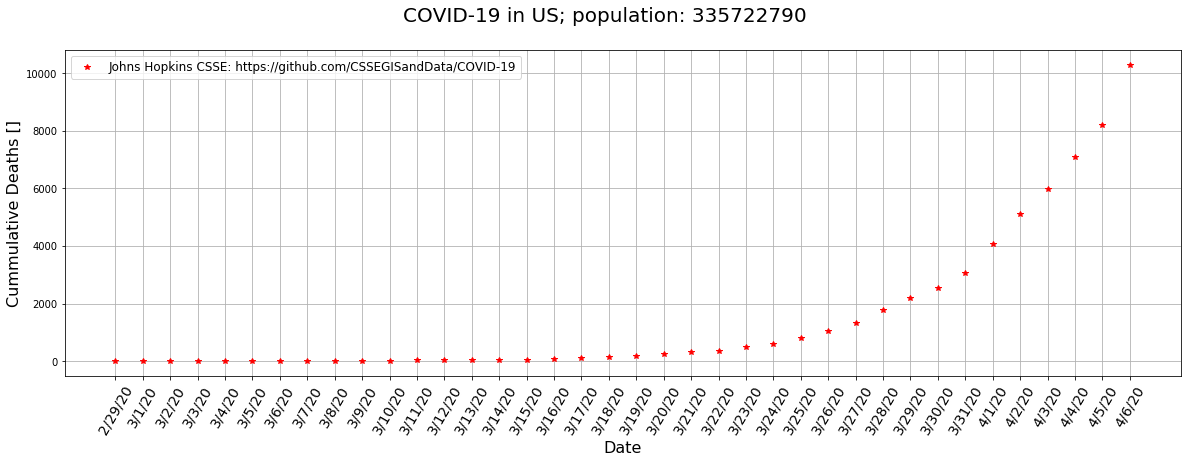

Last 5 days # of cummulative cases = [ 5107.  5991.  7085.  8199. 10288.]
Last 5 days # of added cases = [884.0, 1094.0, 1114.0, 2089.0]


In [4]:
'''1.2) Plot data'''


In [5]:
'''1.2) Build linear system'''


In [6]:
'''1.2) Solve normal equations'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.889e-15
x_vec = [0.926 0.229]
beta   = 2.525e+00 []
alpha  = 2.291e-01 [1/day]
T2     =         4 [day]


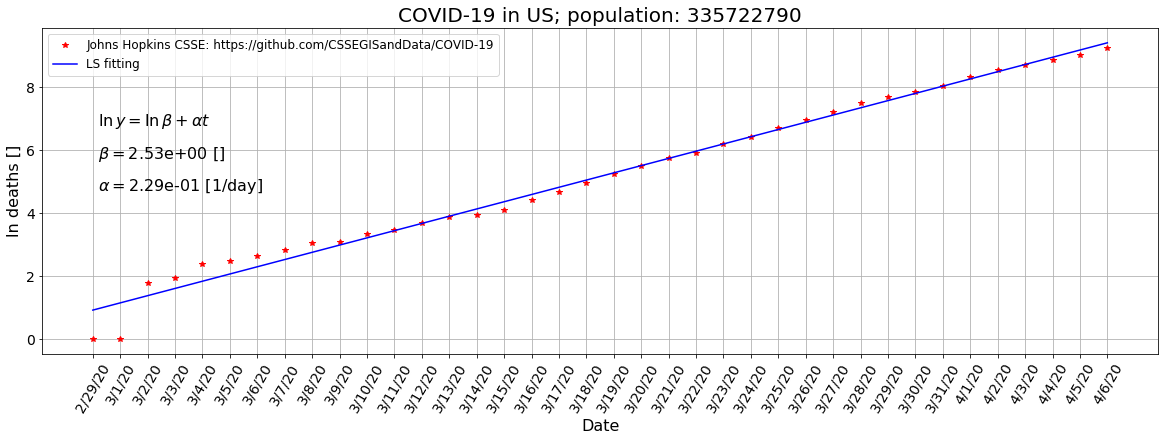

In [7]:
'''1.2) Plot fit in the transformed plane'''


In [8]:
'''1.2) Residual/error analysis'''


Mean(r_vec)      = 1.57184e-15
Mean(abs(r_vec)) = 1.85191e-01
std(abs(r_vec))  = 2.42951e-01

mean absolute error =  0.19 (min. val.= 0.00, max. val.= 9.24, ref.= 5.16)
mean relative error [%] =  4.34
std  relative error [%] =  6.33


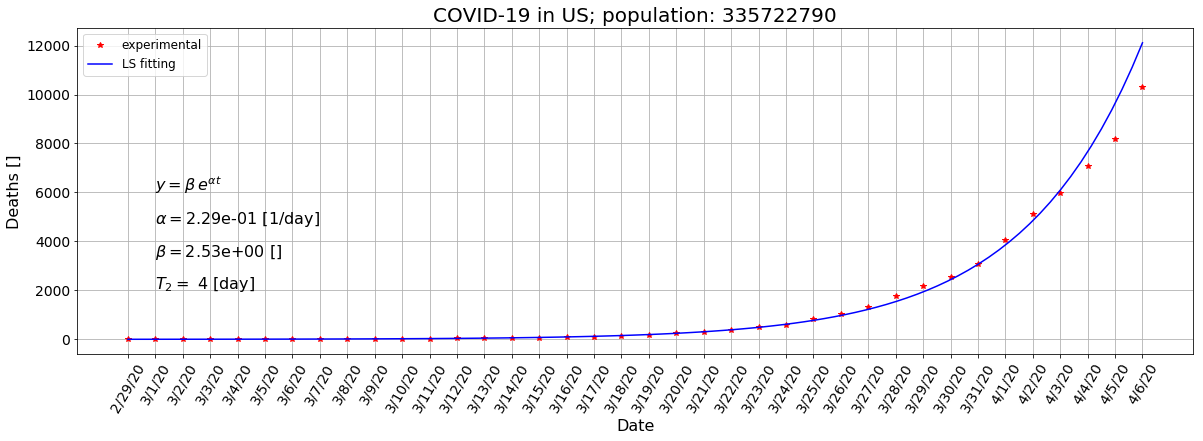

Last 5 days # of cummulative cases = [ 5107.  5991.  7085.  8199. 10288.]
Last 5 days # of added cases = [884.0, 1094.0, 1114.0, 2089.0]


In [9]:
'''1.2) Plot fit in the Carteasian plane'''


In [10]:
'''1.2) Error analysis'''


mean relative error [%] = 21.79
std  relative error [%] = 40.73
discard dates with small number of cases
mean relative error [%] = 11.65
std  relative error [%] = 10.80


[toc](#toc)<span style="color:blue">
1.3) Verify how realistic the predictions of the doubling period are. Based on your results, what do you conclude about the data?
</span><a id="a13"></a>

In [11]:
'''1.3) Verifying predictions of the doubling period'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 3.331e-16
x_vec = [0.894 0.232]
beta   = 2.445e+00 []
alpha  = 2.319e-01 [1/day]
T2     =         3 [day]

Predicted versus actual cases 7 days ago
Predicted # of cummulative cases after doubling period =  5070.0
Actual    # of cummulative cases                       =  5107.0
Prediction error [%] = -0.72

Rank(A) = 2
||x_vec - x_vec NumPy|| = 6.667e-16
x_vec = [0.897 0.232]
beta   = 2.453e+00 []
alpha  = 2.316e-01 [1/day]
T2     =         3 [day]

Predicted versus actual cases 6 days ago
Predicted # of cummulative cases after doubling period =  6128.0
Actual    # of cummulative cases                       =  5991.0
Prediction error [%] = 2.29

Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.110e-16
x_vec = [0.897 0.232]
beta   = 2.452e+00 []
alpha  = 2.316e-01 [1/day]
T2     =         3 [day]

Predicted versus actual cases 5 days ago
Predicted # of cummulative cases after doubling period =  8140.0
Actual    # of cummulative cases                       =  

**Explain results and conclude:** Computing the doubling period in the past allows for comparing predictions in the present. This gives a good indication whether the model fits the data. Going back 7 days allows for a **prediction error of -0.72%**. Going back 6 days allows for a **prediction error of 2.29%**. Going back 5 days the **error is 14.89%**. Going back 4 days days the error is **24.58%**. The model is getting increasingly worse for fitting the data. This indicates that the data is not fitting the exponential model which is good news for controlling the spread of the COVID-19 virus.

[toc](#toc)<span style="color:blue">
1.4) Compute the daily variation of the doubling period with time. Make a plot and explain the significance of this result.
</span><a id="a14"></a>

In [12]:
'''1.4) Compute and plot the daily history of the doubling period'''


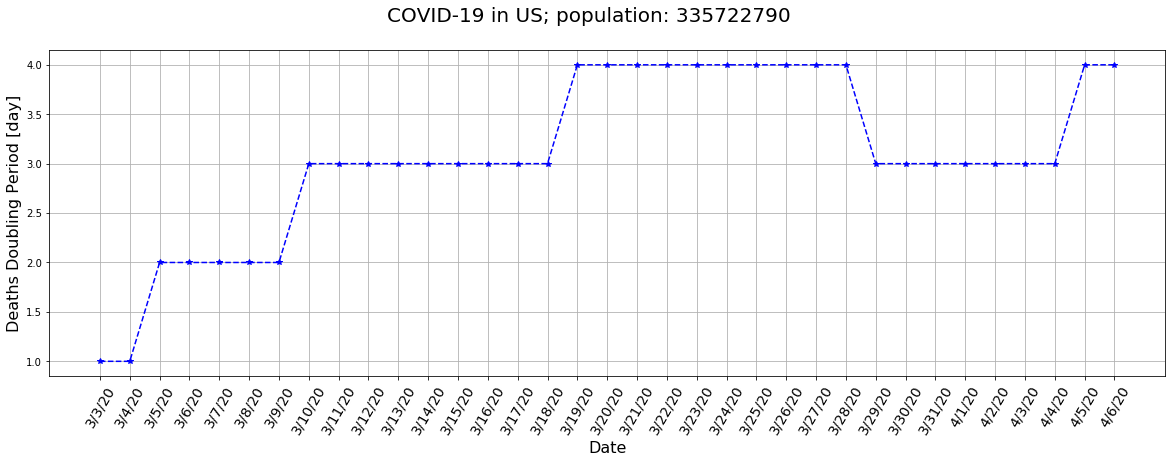

**Significance of the doubling period variation with time:** 

[toc](#toc)<span style="color:blue">
1.5) Technical summary for communicating your results.
</span><a id="a15"></a>

In [14]:
'''1.5) Technical summary communicating results'''


***************************************************************************
                           COVID-19 Trend                                  
             Computed doubling period of deaths cases for US                   
***************************************************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 07-Apr-2020

US: after  4 [days], expected new deaths =  10288, rate(100k) = 6.1

Starting date: 3/17/20
T2 [day] = [3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4]

Last 5 days # of cummulative cases = [ 5107.  5991.  7085.  8199. 10288.]
Last 5 days # of added cases = [884.0, 1094.0, 1114.0, 2089.0]

For reference:
US 2018 death rate(100k) influenza/pneumonia: 14.9 https://www.cdc.gov/nchs/products/databriefs/db355.htm
US 2018 (leading) death rate(100k) heart disea

## <span style="color:blue">Assignment 2 (20 pts): For each item below respond in a separate notebook cell.</span> </span><a id="a2"></a>

[toc](#toc)<span style="color:blue">
2.1)
Calculate the optimal doubling period for the US death cases. Round up the result to the nearest natural number for the doubling period. Reproduce the results shown below. 
</span><a id="a21"></a>

In [15]:
'''2.1) Get data per state/territory in US'''

case_type = 'confirmed'
(state_names, populations, dates, cases) = get_covid_19_us_data(type=case_type)

In [16]:
'''2.1) Combine the data into overall US data for times when cases are non-zero'''

population = np.sum(populations)
us_cases = np.sum(cases,axis=1)
# select data with non-zero cases only
(nz_cases_ids,) = np.where(us_cases>0)
us_cases = us_cases[nz_cases_ids]
us_dates = dates[nz_cases_ids]

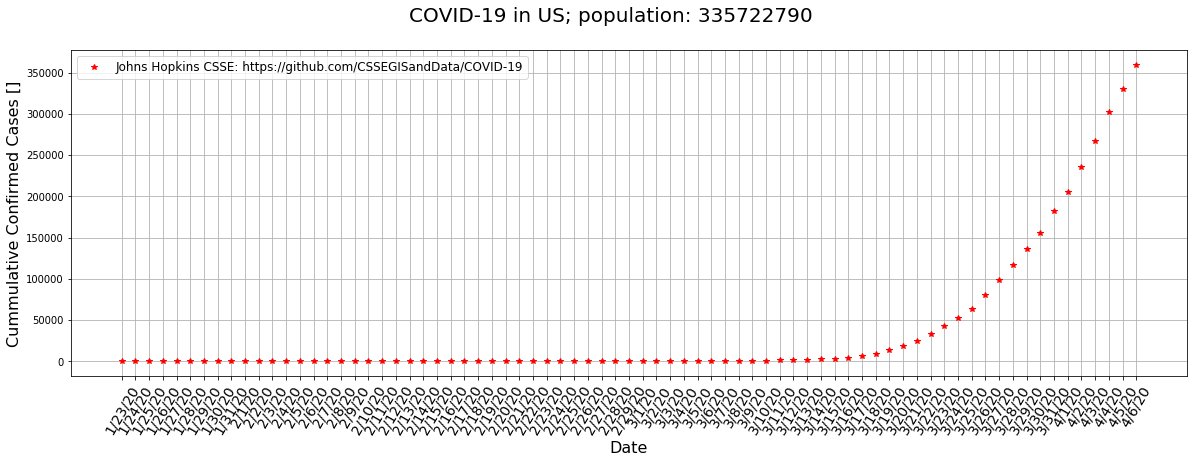

Last 5 days # of cummulative cases = [235580. 267531. 302063. 330115. 359420.]
Last 5 days # of added cases = [31951.0, 34532.0, 28052.0, 29305.0]


In [17]:
'''2.1) Plot data'''


In [18]:
'''2.1) Build linear system'''


In [19]:
'''2.1) Solve normal equations'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 0.000e+00
x_vec = [-0.845  0.174]
beta   = 4.294e-01 []
alpha  = 1.737e-01 [1/day]
T2     =         4 [day]


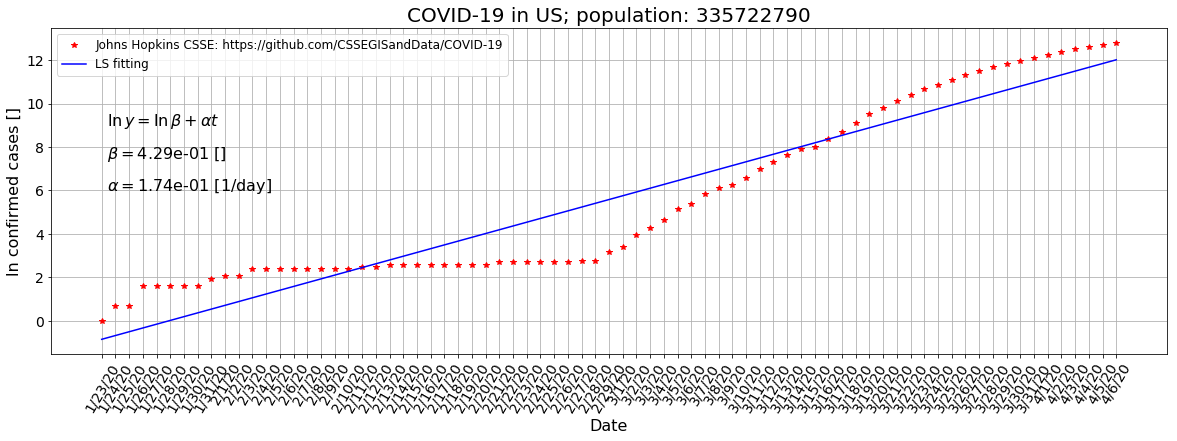

In [20]:
'''2.1) Plot fit in the transformed plane'''


In [21]:
'''2.1) Residual/error analysis'''


Mean(r_vec)      = -1.12503e-15
Mean(abs(r_vec)) = 1.09647e+00
std(abs(r_vec))  = 6.18488e-01

mean absolute error =  1.10 (min. val.= 0.00, max. val.=12.79, ref.= 5.58)
mean relative error [%] = 37.16
std  relative error [%] = 39.63


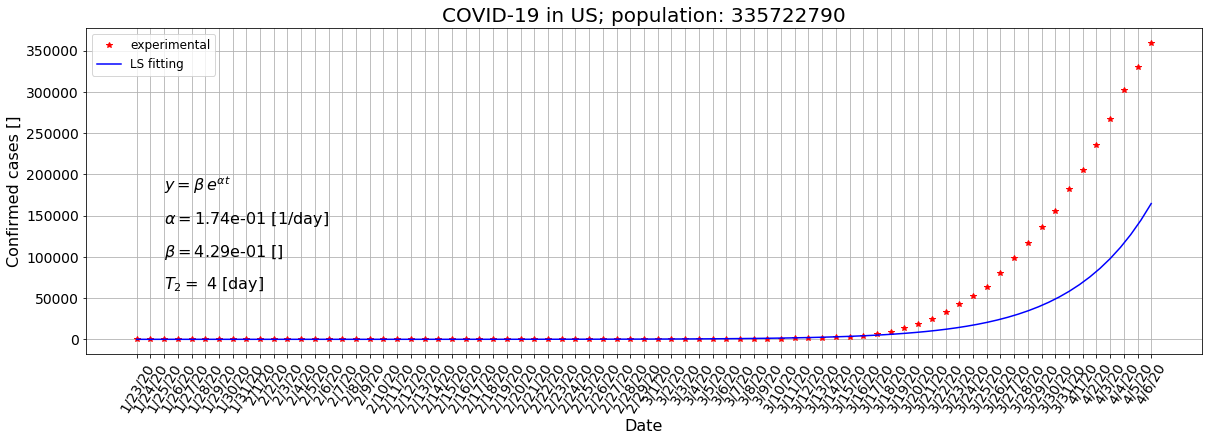

Last 5 days # of cummulative cases = [235580. 267531. 302063. 330115. 359420.]
Last 5 days # of added cases = [31951.0, 34532.0, 28052.0, 29305.0]


In [22]:
'''2.1) Plot fit in the Carteasian plane'''


In [23]:
'''2.1) Error analysis'''


mean relative error [%] = 192.90
std  relative error [%] = 281.19
discard dates with small number of cases
mean relative error [%] = 213.33
std  relative error [%] = 299.67


[toc](#toc)<span style="color:blue">
2.2) Verify how realistic the predictions of the doubling period are. Based on your results, what do you conclude about the data?
</span><a id="a22"></a>

In [24]:
'''2.2) Verifying predictions of the doubling period'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.111e-15
x_vec = [-0.618  0.164]
beta   = 5.391e-01 []
alpha  = 1.639e-01 [1/day]
T2     =         5 [day]

Predicted versus actual cases 7 days ago
Predicted # of cummulative cases after doubling period =  310658.0
Actual    # of cummulative cases                       =  302063.0
Prediction error [%] = 2.85

Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.111e-15
x_vec = [-0.662  0.166]
beta   = 5.159e-01 []
alpha  = 1.659e-01 [1/day]
T2     =         5 [day]

Predicted versus actual cases 6 days ago
Predicted # of cummulative cases after doubling period =  364368.0
Actual    # of cummulative cases                       =  330115.0
Prediction error [%] = 10.38

Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.444e-15
x_vec = [-0.702  0.168]
beta   = 4.958e-01 []
alpha  = 1.676e-01 [1/day]
T2     =         5 [day]

Predicted versus actual cases 5 days ago
Predicted # of cummulative cases after doubling period =  411630.0
Actual    # of cummulative cases          

**Explain results and conclude:** 

[toc](#toc)<span style="color:blue">
2.3) Compute the daily variation of the doubling period with time. Make a plot and explain the significance of this result.
</span><a id="a23"></a>

In [25]:
'''2.3) Compute and plot the daily history of the doubling period'''


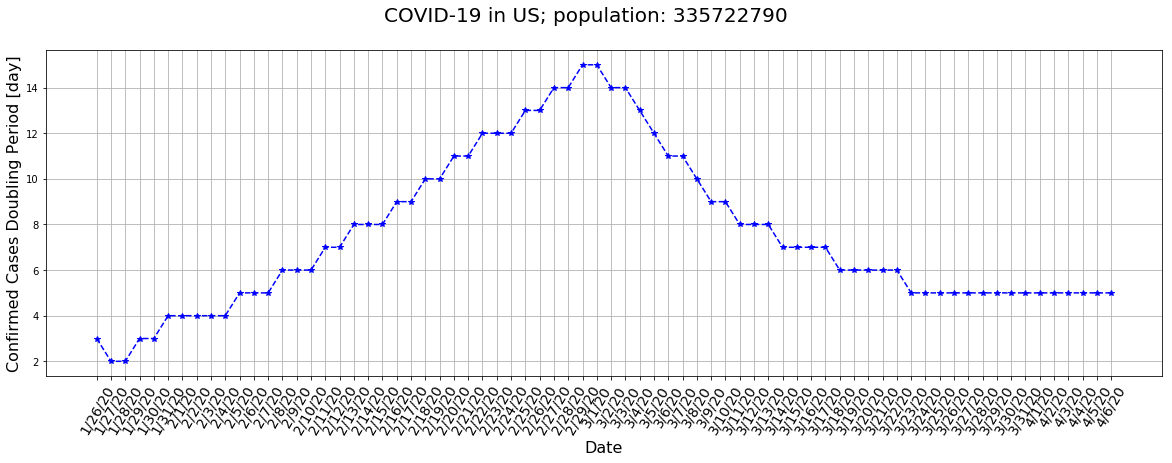

[toc](#toc)<span style="color:blue">
2.4) Technical summary for communicating your results.
</span><a id="a24"></a>

In [27]:
'''2.4) Technical summary communicating results'''


***************************************************************************
                           COVID-19 Trend                                  
             Computed doubling period of confirmed cases for US                   
***************************************************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 07-Apr-2020

US: after  5 [days], expected new confirmed cases = 359420, rate(100k) = 214.1

Starting date: 3/17/20
T2 [day] = [7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

Last 5 days # of cummulative cases = [235580. 267531. 302063. 330115. 359420.]
Last 5 days # of added cases = [31951.0, 34532.0, 28052.0, 29305.0]



## <span style="color:blue">Assignment 3 (20 pts): For each item below respond in a separate notebook cell.</span> </span><a id="a3"></a>

[toc](#toc)<span style="color:blue">
3.1)
Calculate the optimal doubling period for Massachusetts death cases. Round up the result to the nearest natural number for the doubling period. Reproduce the results shown below. 
</span><a id="a31"></a>

In [28]:
'''3.1) Get data per state/territory in US'''

from chen_3170.help import get_covid_19_us_data

case_type = 'deaths'
(state_names, populations, dates, cases) = get_covid_19_us_data(type=case_type)

In [41]:
'''3.1) Get Massachusetts data for times when cases are non-zero'''

import numpy as np

state = 'Massachusetts'
assert state in state_names, 'State: %r not in %r'%(state,state_names)
state_id = state_names.index(state)
population = populations[state_id]
(nz_cases_ids,) = np.where(cases[:,state_id]>0)
state_cases = cases[nz_cases_ids,state_id]
state_dates = dates[nz_cases_ids]

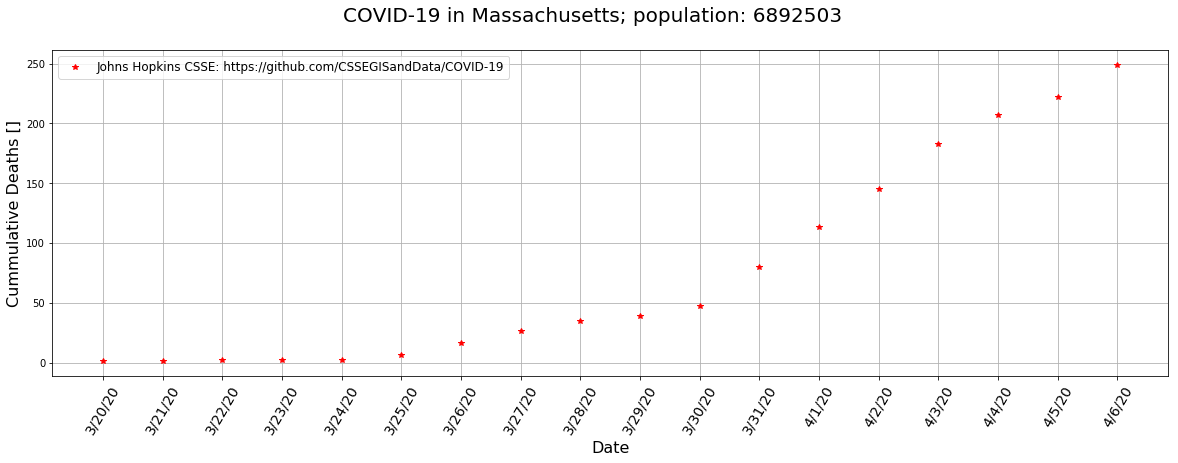

Last 5 days # of cummulative cases = [145. 183. 207. 222. 249.]
Last 5 days # of added cases = [38.0, 24.0, 15.0, 27.0]


In [42]:
'''3.1) Plot data'''


In [43]:
'''3.1) Build linear system'''


In [44]:
'''3.1) Solve normal equations'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 3.053e-16
x_vec = [0.036 0.365]
beta   = 1.037e+00 []
alpha  = 3.652e-01 [1/day]
T2     =         2 [day]


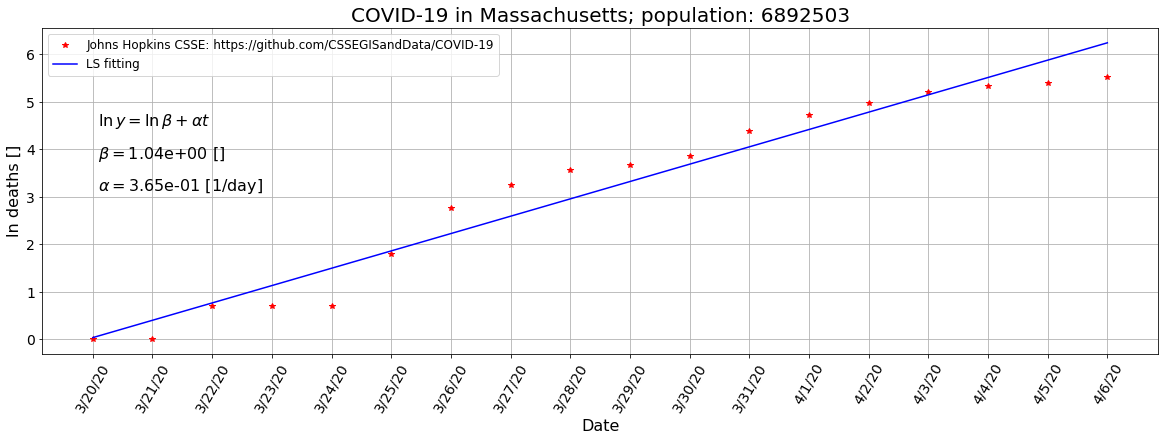

In [45]:
'''3.1) Plot fit in the transformed plane'''


In [46]:
'''3.1) Residual/error analysis'''


Mean(r_vec)      = -5.18104e-16
Mean(abs(r_vec)) = 3.56185e-01
std(abs(r_vec))  = 2.35740e-01

mean absolute error =  0.36 (min. val.= 0.00, max. val.= 5.52, ref.= 3.14)
mean relative error [%] = 19.28
std  relative error [%] = 28.70


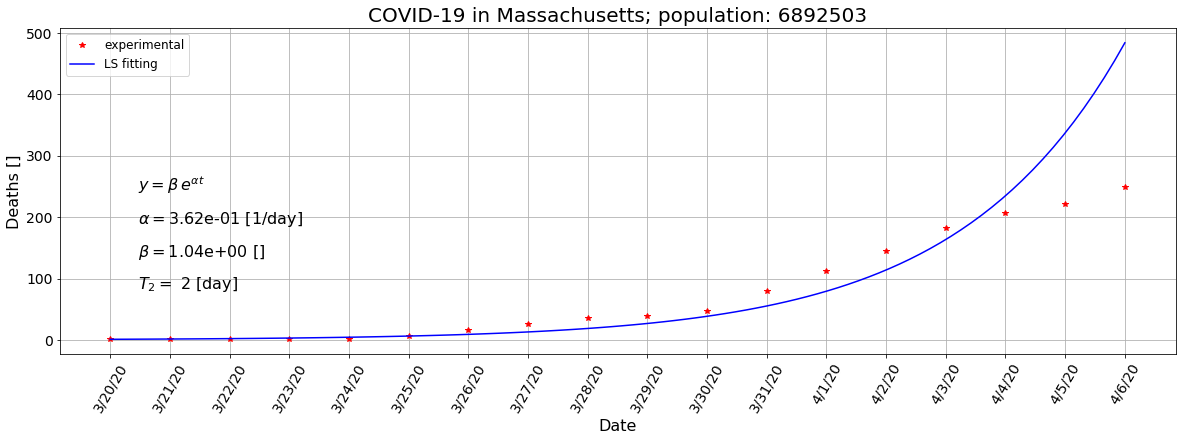

Last 5 days # of cummulative cases = [145. 183. 207. 222. 249.]
Last 5 days # of added cases = [38.0, 24.0, 15.0, 27.0]


In [47]:
'''3.1) Plot fit in the Carteasian plane'''


In [48]:
'''3.1) Error analysis'''


mean relative error [%] = 38.42
std  relative error [%] = 32.32
discard dates with small number of cases
mean relative error [%] = 37.11
std  relative error [%] = 25.90


[toc](#toc)<span style="color:blue">
3.2) Verify how realistic the predictions of the doubling period are. Based on your results, what do you conclude about the data?
</span><a id="a32"></a>

In [49]:
'''3.2) Verifying predictions of the doubling period'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 7.301e-16
x_vec = [-0.353  0.452]
beta   = 7.028e-01 []
alpha  = 4.518e-01 [1/day]
T2     =         2 [day]

Predicted versus actual cases 7 days ago
Predicted # of cummulative cases after doubling period =  94.0
Actual    # of cummulative cases                       =  113.0
Prediction error [%] = -16.81

Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.110e-16
x_vec = [-0.323  0.443]
beta   = 7.243e-01 []
alpha  = 4.428e-01 [1/day]
T2     =         2 [day]

Predicted versus actual cases 6 days ago
Predicted # of cummulative cases after doubling period =  160.0
Actual    # of cummulative cases                       =  145.0
Prediction error [%] = 10.34

Rank(A) = 2
||x_vec - x_vec NumPy|| = 2.289e-16
x_vec = [-0.291  0.434]
beta   = 7.478e-01 []
alpha  = 4.341e-01 [1/day]
T2     =         2 [day]

Predicted versus actual cases 5 days ago
Predicted # of cummulative cases after doubling period =  226.0
Actual    # of cummulative cases                       =

**Explain results and conclude:**

[toc](#toc)<span style="color:blue">
3.3) Compute the daily variation of the doubling period with time. Make a plot and explain the significance of this result.
</span><a id="a33"></a>

In [50]:
'''3.3) Compute the daily history of the doubling period'''


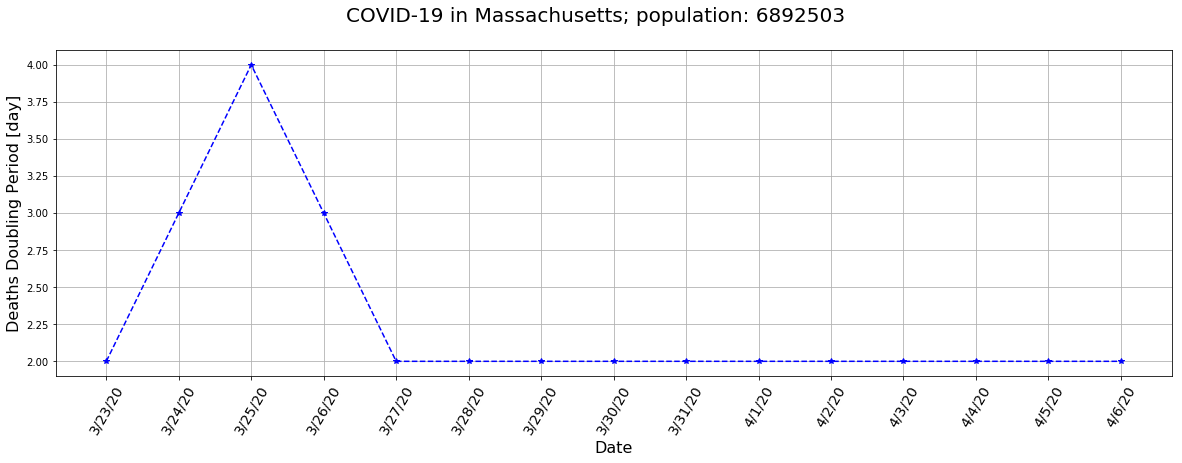

**Significance of the doubling period variation with time:** The doubling period in an exponentially growing function is a constant (not dependent on time). The results show that the doubling period has been increasing and this is good news for containing the spread of COVID-19.

[toc](#toc)<span style="color:blue">
3.4) Technical summary for communicating your results.
</span><a id="a34"></a>

In [52]:
'''3.4) Technical summary communicating results'''


***************************************************************************
                           COVID-19 Trend                                  
             Computed doubling period of deaths cases for US                   
***************************************************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 07-Apr-2020

Massachusetts: after  2 [days], expected new deaths =    249, rate(100k) = 7.2

Starting date: 3/24/20
T2 [day] = [3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Last 5 days # of cummulative cases = [145. 183. 207. 222. 249.]
Last 5 days # of added cases = [38.0, 24.0, 15.0, 27.0]

For reference:
US 2018 death rate(100k) influenza/pneumonia: 14.9 https://www.cdc.gov/nchs/products/databriefs/db355.htm
US 2018 (leading) death rate(100k) heart disease: 163.6 https://www.cdc.g

## <span style="color:blue">Assignment 4 (20 pts): For each item below respond in a separate notebook cell.</span> </span><a id="a4"></a>

[toc](#toc)<span style="color:blue">
4.1) Compute the doubling period for all US states/territories with available data and produce a communication report as follows:
</span><a id="a41"></a>

In [53]:
'''4.1) Compute doubling period and report'''


***************************************************************************
                           COVID-19 Trend                                  
     Computed doubling period of deaths cases per US states and territories      
********************************(******************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 07-Apr-2020

                 Alabama: after  3 [days], expected new deaths =     49, rate(100k) = 2.0
                 Arizona: after  3 [days], expected new deaths =     55, rate(100k) = 1.5
                Arkansas: after  4 [days], expected new deaths =      6, rate(100k) = 0.4
              California: after  4 [days], expected new deaths =    380, rate(100k) = 1.9
                Colorado: after  3 [days], expected new deaths =    149, rate(100k) = 5.2
             Connecti

## <span style="color:blue">Assignment 5 (20 pts): For each item below respond in a separate notebook cell.</span> </span><a id="a4"></a>

[toc](#toc)<span style="color:blue">
5.1) Use the linear least squares method with Fourier basis functions to approximate the COVID-19 death distribution in China.
</span><a id="a51"></a>

In [54]:
'''5.1) Get data per country'''

from chen_3170.help import get_covid_19_global_data

case_type = 'deaths'
(country_names, dates, cases) = get_covid_19_global_data(type=case_type)

In [55]:
'''5.1) Get China data for times when cases are non-zero'''

import numpy as np

country = 'China'
assert country in country_names, 'State: %r not in %r'%(country,country_names)
country_id = country_names.index(country)
(nz_cases_ids,) = np.where(cases[:,country_id]>0)
country_cases = cases[nz_cases_ids,country_id]
country_dates = dates[nz_cases_ids]

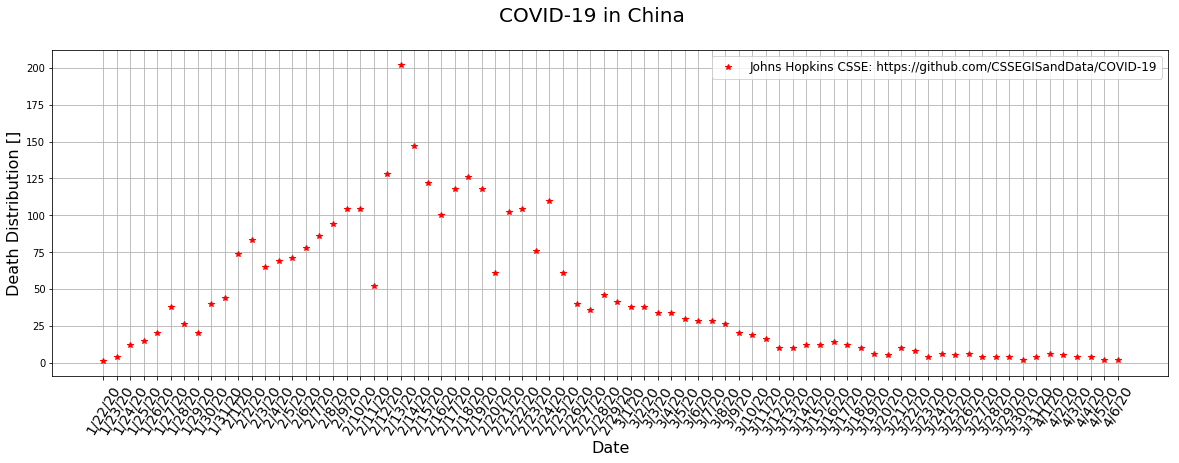

Last 5 days # of added cases = [5. 4. 4. 2. 2.]


In [56]:
'''5.1 Plot data'''


In [57]:
'''5.1) Build the matrix system'''


My rank(A) = 41
NumPy rank(A) = 41


In [58]:
'''5.1) Solve the normal equations for the Fourier amplitudes'''


x_vec = [ 43.684 -21.948  49.304 -17.543 -10.574   4.818  -2.512  -3.213   3.702
  -2.331  -2.458  -0.587  -2.979   4.802   1.353  -3.424   3.753  -1.717
  -2.644   1.499   2.535  -2.713   0.569  -3.576  -0.74    0.383  -5.89
   7.203   1.488  -3.856   4.077  -1.176  -4.785   4.706   1.067  -0.875
   4.587  -4.605  -1.237   2.072  -3.701]
||x_vec - NumPy x_vec|| = 1.222e-14


In [59]:
'''5.1) Function: plot the LS Fourier fit and all modes'''


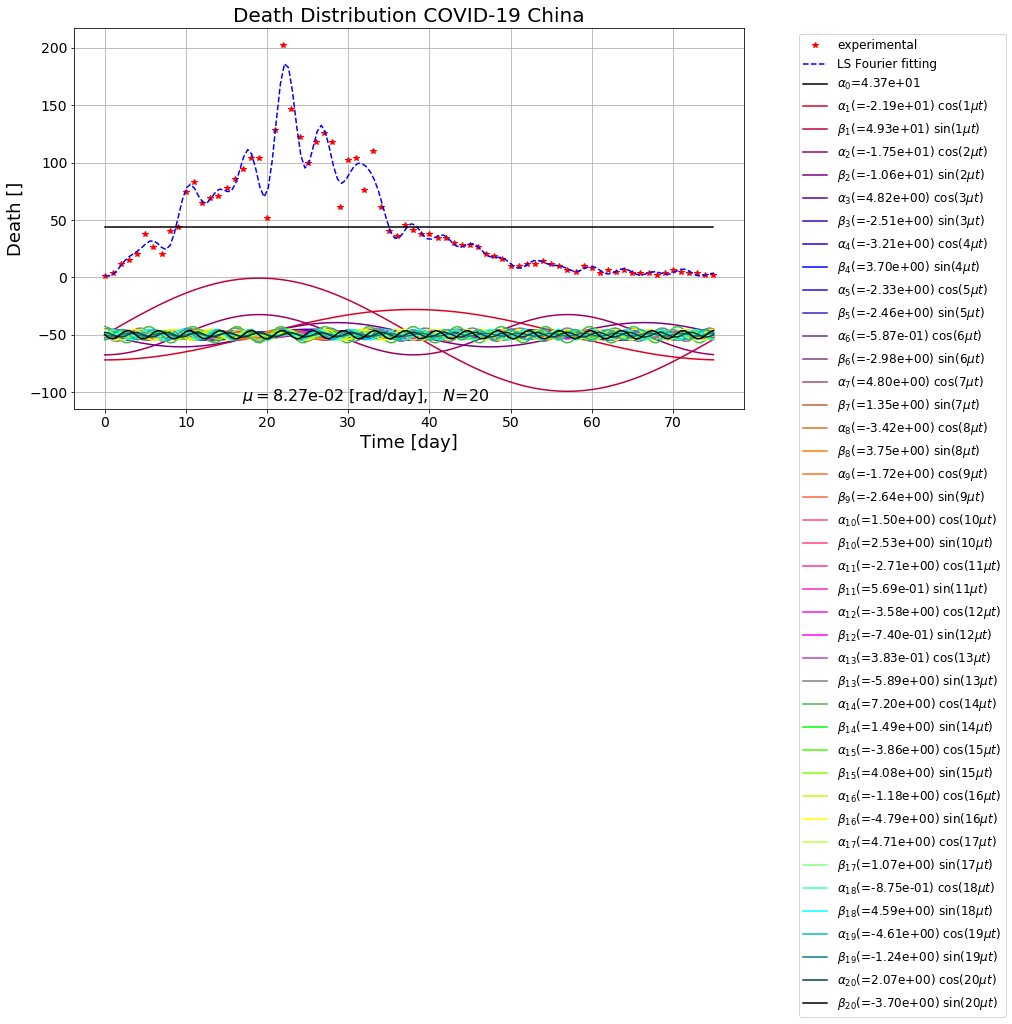

In [60]:
'''5.1) Plot the LS Fourier fit'''


[toc](#toc)<span style="color:blue">
5.2) Perform a modal analysis of the peak data.
</span><a id="a52"></a>

In [61]:
'''5.2) Function: plot the power spectrum (Fourier transform)'''


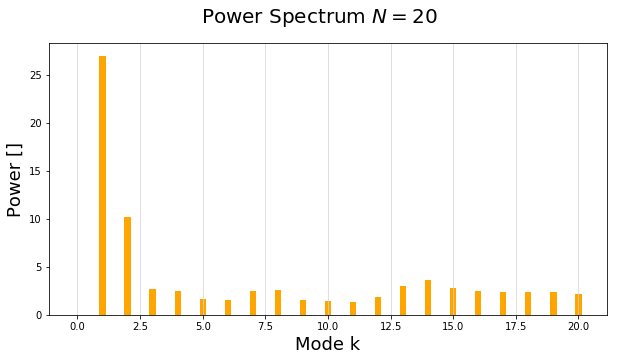

**Modal analysis:**